### Credit Risk Analysis

#### Basic data analysis or exploratory data analysis (EDA)

In [18]:
from __future__ import print_function
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import collections
%matplotlib inline
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import AdaBoostClassifier, GradientBoostingClassifier, RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_auc_score

In [19]:
# Load Training Data set
cr_train = pd.read_csv('./data/Credit Risk - Training.csv').drop('Unnamed: 0', axis = 1)
# clean columns - Remove _ and Make lower case
cleancolumn = []
for i in range(len(cr_train.columns)):
    cleancolumn.append(cr_train.columns[i].replace('-', '').lower())
cr_train.columns = cleancolumn

In [20]:
# print the 5 records of the traiing dataset
cr_train.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [21]:
# This give you the calulation of the target lebels. Which category of the target lebel is how many percentage.
total_len = len(cr_train['seriousdlqin2yrs'])
percentage_labels = (cr_train['seriousdlqin2yrs'].value_counts()/total_len)*100
percentage_labels

0    93.316
1     6.684
Name: seriousdlqin2yrs, dtype: float64

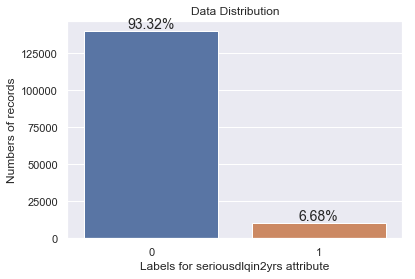

In [22]:
# Graphical representation of the target label percentage.
sns.set()
sns.countplot(cr_train.seriousdlqin2yrs).set_title('Data Distribution')
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            '{:.2f}%'.format(100*(height/total_len)),
            fontsize=14, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("Labels for seriousdlqin2yrs attribute")
ax.set_ylabel("Numbers of records")
plt.show()


### Handling Missing values

In [23]:
# You will get to know which column has missing value and it's give the count that how many records are missing 
cr_train.isnull().sum()

seriousdlqin2yrs                            0
revolvingutilizationofunsecuredlines        0
age                                         0
numberoftime3059dayspastduenotworse         0
debtratio                                   0
monthlyincome                           29731
numberofopencreditlinesandloans             0
numberoftimes90dayslate                     0
numberrealestateloansorlines                0
numberoftime6089dayspastduenotworse         0
numberofdependents                       3924
dtype: int64

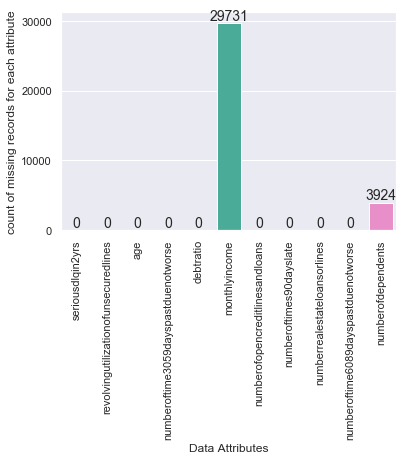

In [24]:
# Graphical representation of the missing values.
x = cr_train.columns
y = cr_train.isnull().sum()
sns.set()
sns.barplot(x,y)
ax = plt.gca()
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x() + p.get_width()/2.,
            height + 2,
            int(height),
            fontsize=14, ha='center', va='bottom')
sns.set(font_scale=1.5)
ax.set_xlabel("Data Attributes")
ax.set_ylabel("count of missing records for each attribute")
plt.xticks(rotation=90)
plt.show()

In [25]:
# Actual replacement of the missing value using mean value.
cr_train_mean_replace = cr_train.fillna((cr_train.mean()))
cr_train_mean_replace.head()

,seriousdlqin2yrs,revolvingutilizationofunsecuredlines,age,numberoftime3059dayspastduenotworse,debtratio,monthlyincome,numberofopencreditlinesandloans,numberoftimes90dayslate,numberrealestateloansorlines,numberoftime6089dayspastduenotworse,numberofdependents
0,1,0.766127,45,2,0.802982,9120.0,13,0,6,0,2.0
1,0,0.957151,40,0,0.121876,2600.0,4,0,0,0,1.0
2,0,0.658180,38,1,0.085113,3042.0,2,1,0,0,0.0
3,0,0.233810,30,0,0.036050,3300.0,5,0,0,0,0.0
4,0,0.907239,49,1,0.024926,63588.0,7,0,1,0,0.0


In [26]:
cr_train_mean_replace.isnull().sum()

seriousdlqin2yrs                        0
revolvingutilizationofunsecuredlines    0
age                                     0
numberoftime3059dayspastduenotworse     0
debtratio                               0
monthlyincome                           0
numberofopencreditlinesandloans         0
numberoftimes90dayslate                 0
numberrealestateloansorlines            0
numberoftime6089dayspastduenotworse     0
numberofdependents                      0
dtype: int64

### Correlation

In [27]:
cr_train.fillna((cr_train.mean()), inplace=True)

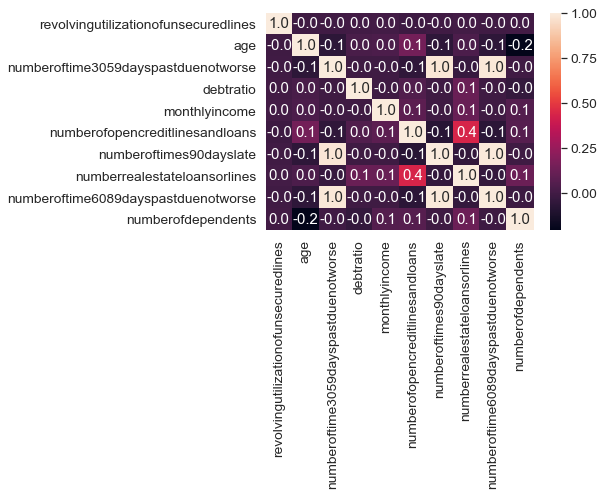

In [28]:
# numberoftime3059dayspastduenotworse is correlated with numberoftimes90dayslate and numberoftime6089dayspastduenotworse    
# numberrealestateloansorlines is correlated with numberofopencreditlinesandloans         
sns.set()
sns.set(font_scale=1.25)
sns.heatmap(cr_train[cr_train.columns[1:]].corr(),annot=True,fmt=".1f")
plt.show()

### Handle the outliers

In [36]:
New = []
for val in cr_train.revolvingutilizationofunsecuredlines:
    if val <= 0.99999:
        New.append(val)
    else:
        New.append(0.99999)
cr_train.revolvingutilizationofunsecuredlines = New

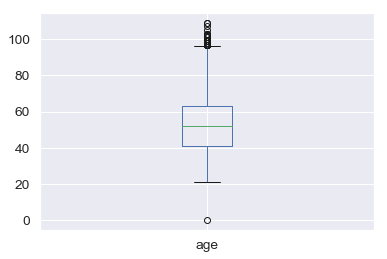

In [37]:
cr_train.age.plot.box()

In [39]:
collections.Counter(cr_train.age)

Counter({45: 3502,
         40: 3093,
         38: 2631,
         30: 1937,
         49: 3837,
         74: 1451,
         57: 3375,
         39: 2987,
         27: 1338,
         51: 3627,
         46: 3714,
         76: 1183,
         64: 3058,
         78: 1054,
         53: 3648,
         43: 3208,
         25: 953,
         32: 2050,
         58: 3443,
         50: 3753,
         69: 1954,
         24: 816,
         28: 1560,
         62: 3568,
         42: 3082,
         75: 1241,
         26: 1193,
         52: 3609,
         41: 3122,
         81: 774,
         31: 2038,
         68: 2235,
         70: 1777,
         73: 1520,
         29: 1702,
         55: 3416,
         35: 2246,
         72: 1649,
         60: 3258,
         67: 2503,
         36: 2379,
         56: 3589,
         37: 2521,
         66: 2494,
         83: 512,
         34: 2155,
         44: 3294,
         48: 3806,
         61: 3522,
         80: 876,
         47: 3719,
         59: 3280,
         77: 1099

In [40]:
ageNew = []
for val in cr_train.age:
    if val > 21:
        ageNew.append(val)
    else:
        ageNew.append(21)
        
cr_train.age = ageNew

In [42]:
collections.Counter(cr_train.numberoftime3059dayspastduenotworse)

Counter({2: 4598,
         0: 126018,
         1: 16033,
         3: 1754,
         4: 747,
         5: 342,
         7: 54,
         10: 4,
         6: 140,
         98: 264,
         12: 2,
         8: 25,
         9: 12,
         96: 5,
         13: 1,
         11: 1})

In [45]:
New = []
med = cr_train.numberoftime3059dayspastduenotworse.median()
for val in cr_train.numberoftime3059dayspastduenotworse:
    if ((val == 98) | (val == 96)):
        New.append(med)
    else:
        New.append(val)

cr_train.numberoftime3059dayspastduenotworse = New

In [47]:
collections.Counter(cr_train.numberrealestateloansorlines)

Counter({6: 320,
         0: 56188,
         1: 52338,
         3: 6300,
         4: 2170,
         2: 31522,
         5: 689,
         8: 93,
         7: 171,
         9: 78,
         17: 4,
         15: 7,
         10: 37,
         12: 18,
         11: 23,
         16: 4,
         26: 1,
         14: 7,
         54: 1,
         21: 1,
         18: 2,
         13: 15,
         23: 2,
         29: 1,
         25: 3,
         19: 2,
         20: 2,
         32: 1})

In [48]:
realNew = []
for val in cr_train.numberrealestateloansorlines:
    if val > 17:
        realNew.append(17)
    else:
        realNew.append(val)
cr_train.numberrealestateloansorlines = realNew

In [50]:
collections.Counter(cr_train.numberofdependents)

Counter({2.0: 19522,
         1.0: 26316,
         0.0: 86902,
         0.7572222678605657: 3924,
         3.0: 9483,
         4.0: 2862,
         5.0: 746,
         6.0: 158,
         8.0: 24,
         7.0: 51,
         20.0: 1,
         10.0: 5,
         9.0: 5,
         13.0: 1})

In [51]:
depNew = []
for var in cr_train.numberofdependents:
    if var > 10:
        depNew.append(10)
    else:
        depNew.append(var)
cr_train.numberofdependents = depNew

## Train and build baseline model

In [53]:
X = cr_train.drop('seriousdlqin2yrs', axis=1)
y = cr_train.seriousdlqin2yrs

In [54]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25)

### KNN Classifcation

In [55]:
knMod = KNeighborsClassifier(n_neighbors=5, weights='uniform', algorithm='auto', leaf_size=30, p=2,
                             metric='minkowski', metric_params=None)

In [56]:
knMod.fit(X_train, y_train)

KNeighborsClassifier(algorithm='auto', leaf_size=30, metric='minkowski',
           metric_params=None, n_jobs=None, n_neighbors=5, p=2,
           weights='uniform')

In [57]:
knMod.score(X_test, y_test)

0.9323733333333334

In [58]:
test_labels=knMod.predict_proba(np.array(X_test.values))[:,1]

In [59]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.5646611266062449

### Logistic Regression

In [60]:
glmMod = LogisticRegression(penalty='l1', dual=False, tol=0.0001, C=1.0, fit_intercept=True,
                            intercept_scaling=1, class_weight=None, 
                            random_state=None, solver='liblinear', max_iter=100,
                            multi_class='ovr', verbose=2)

In [61]:
glmMod.fit(X_train, y_train)

[LibLinear]

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
          intercept_scaling=1, max_iter=100, multi_class='ovr',
          n_jobs=None, penalty='l1', random_state=None, solver='liblinear',
          tol=0.0001, verbose=2, warm_start=False)

In [62]:
glmMod.score(X_test, y_test)

0.9336533333333333

In [63]:
test_labels=glmMod.predict_proba(np.array(X_test.values))[:,1]

In [64]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.826858736204938

### AdaBoost 

In [65]:
adaMod = AdaBoostClassifier(base_estimator=None, n_estimators=200, learning_rate=1.0)

In [66]:
adaMod.fit(X_train, y_train)

AdaBoostClassifier(algorithm='SAMME.R', base_estimator=None,
          learning_rate=1.0, n_estimators=200, random_state=None)

In [67]:
adaMod.score(X_test, y_test)

0.9345866666666667

In [68]:
test_labels=adaMod.predict_proba(np.array(X_test.values))[:,1]

In [69]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.8549872088080108

### Gradiant Boosting

In [70]:
gbMod = GradientBoostingClassifier(loss='deviance', learning_rate=0.1, n_estimators=200, subsample=1.0,
                                   min_samples_split=2, min_samples_leaf=1, min_weight_fraction_leaf=0.0, 
                                   max_depth=3,
                                   init=None, random_state=None, max_features=None, verbose=0)

In [71]:
gbMod.fit(X_train, y_train)

GradientBoostingClassifier(criterion='friedman_mse', init=None,
              learning_rate=0.1, loss='deviance', max_depth=3,
              max_features=None, max_leaf_nodes=None,
              min_impurity_decrease=0.0, min_impurity_split=None,
              min_samples_leaf=1, min_samples_split=2,
              min_weight_fraction_leaf=0.0, n_estimators=200,
              n_iter_no_change=None, presort='auto', random_state=None,
              subsample=1.0, tol=0.0001, validation_fraction=0.1,
              verbose=0, warm_start=False)

In [72]:
gbMod.score(X_test, y_test)

0.9357333333333333

In [73]:
test_labels=gbMod.predict_proba(np.array(X_test.values))[:,1]

In [74]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.859702708819041

### Random Forset 

In [75]:
rfMod = RandomForestClassifier(n_estimators=10, criterion='gini', max_depth=None, min_samples_split=2,
                               min_samples_leaf=1, min_weight_fraction_leaf=0.0, max_features='auto',
                               max_leaf_nodes=None, bootstrap=True, oob_score=False, n_jobs=1, 
                               random_state=None, verbose=0)

In [76]:
rfMod.fit(X_train, y_train)

RandomForestClassifier(bootstrap=True, class_weight=None, criterion='gini',
            max_depth=None, max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, n_estimators=10, n_jobs=1,
            oob_score=False, random_state=None, verbose=0,
            warm_start=False)

In [77]:
rfMod.score(X_test, y_test)

0.9316

In [78]:
test_labels=rfMod.predict_proba(np.array(X_test.values))[:,1]

In [79]:
roc_auc_score(y_test,test_labels , average='macro', sample_weight=None)

0.7769684034726347

### Ada Boost and Gradiant Boosting seems be perform Better 